# Using Regression models on Boston Dataset

## Import libraries and dataset

### Import libraries

In [86]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

### Load dataset

In [87]:
boston_data = load_boston()
dataset = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
# Add target variable
dataset["MEDV"] = boston_data.target


## Information about the dataset

In [88]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Display basic information about de data

In [89]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Some plots to understand the data

### Correlation matrix

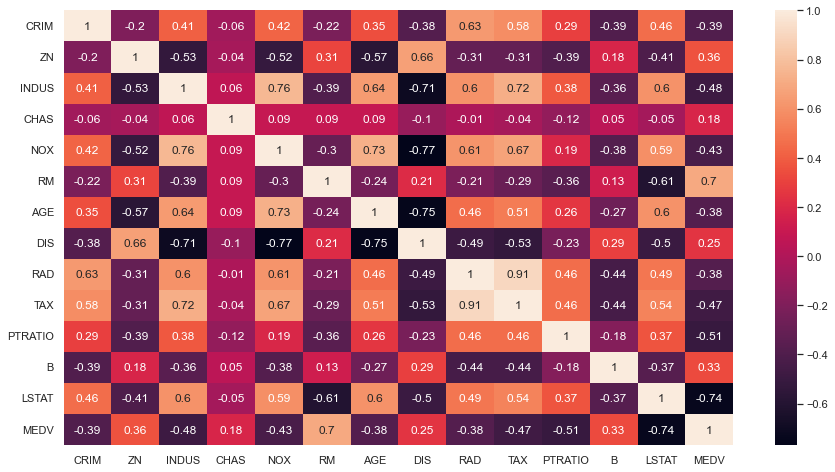

In [90]:
corr_matrix = dataset.corr().round(2)
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.heatmap(corr_matrix,annot=True)
plt.show()

MEDV is strongly positively correlated with RM and strongly negative correlated with LSTAT. Also RM and LSTAT are negatively correlated between them.

### Barplot and violin plot

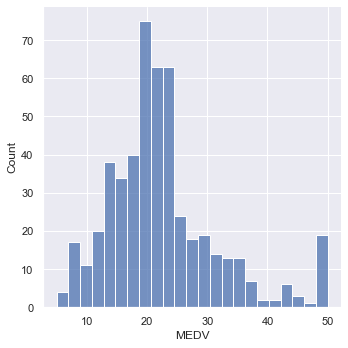

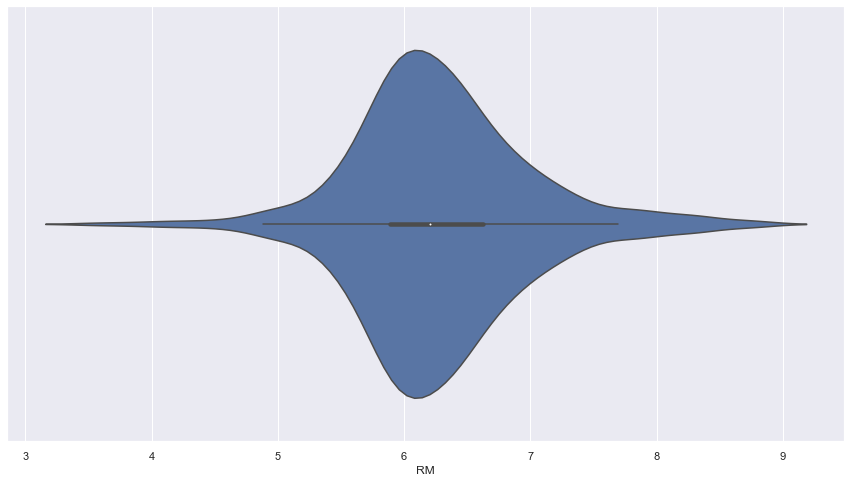

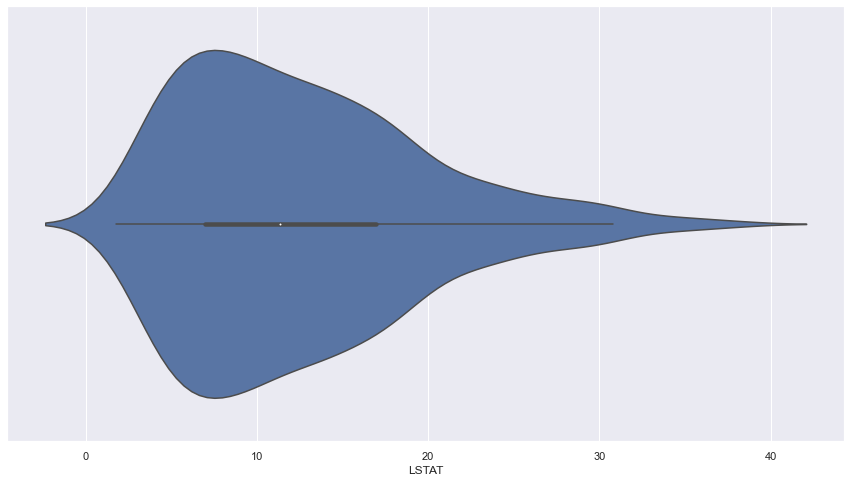

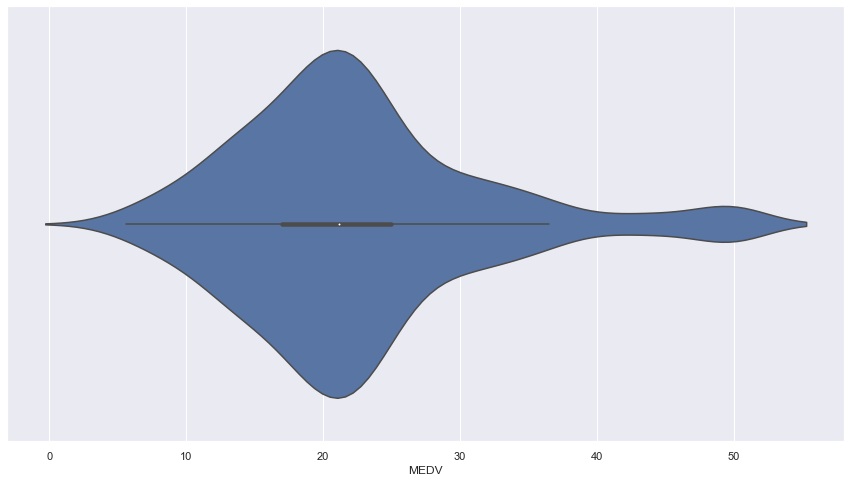

In [91]:
g = sns.displot(dataset["MEDV"])
plt.show()
g = sns.violinplot(x=dataset["RM"])
plt.show()
g = sns.violinplot(x=dataset["LSTAT"])
plt.show()
g = sns.violinplot(x=dataset["MEDV"])
plt.show()

We don't have outliers in this variables that could possibly ruin our model

## Split dataset


In [92]:
X = dataset.drop(["MEDV"], axis="columns")
y = dataset.iloc[:,-1].values
y = y.reshape(len(y),1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


## Apply different regression models

### Apply Linear Regression

In [93]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("r2 accuracy score is: {}".format((r2_score(y_test,y_pred)*100).round(4)))
print("MSE score is: {}".format((mean_squared_error(y_test,y_pred)).round(4)))


r2 accuracy score is: 63.5464
MSE score is: 29.7822


### Apply Decision Tree

In [94]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Accuracy score is: {}".format((r2_score(y_test,y_pred)*100).round(4)))
print("MSE score is: {}".format((mean_squared_error(y_test,y_pred)).round(4)))

Accuracy score is: 65.7554
MSE score is: 27.9775


### Polynomial Regression

In [95]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

y_pred = regressor.predict(poly_reg.transform(X_test))

print("Accuracy score is: {}".format((r2_score(y_test,y_pred)*100).round(4)))
print("MSE score is: {}".format((mean_squared_error(y_test,y_pred)).round(4)))

Accuracy score is: 55.1568
MSE score is: 36.6364


Only gives "good" results using degree 1 (LinearRegression) and 2. But using degree = 2 is even worst than Linear Regression

### Random Forest Regression

In [96]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_train, y_train.ravel())
y_pred = regressor.predict(X_test)
print("Accuracy score is: {}".format((r2_score(y_test,y_pred)*100).round(4)))
print("MSE score is: {}".format((mean_squared_error(y_test,y_pred)).round(4)))

Accuracy score is: 79.9037
MSE score is: 16.4185


### Support Vector Regression

In [97]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))

print("Accuracy score is: {}".format((r2_score(y_test,y_pred)*100).round(4)))
print("MSE score is: {}".format((mean_squared_error(y_test,y_pred)).round(4)))

Accuracy score is: 70.465
MSE score is: 24.1298


# Final comentaries
We observed that among all the algorithms Random Forest had the best fit for this dataset.